In [ ]:
pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data = data.drop('id', axis=1)

In [ ]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data=data.drop(["diagnosis"],axis=1)

Image Variable: 

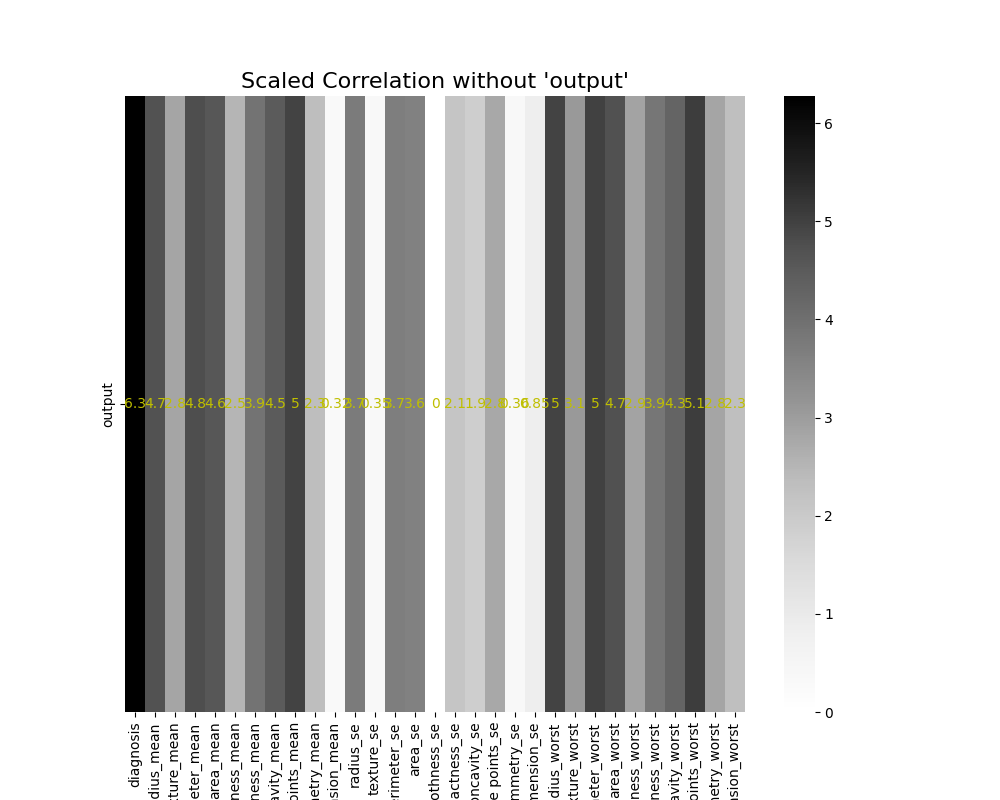

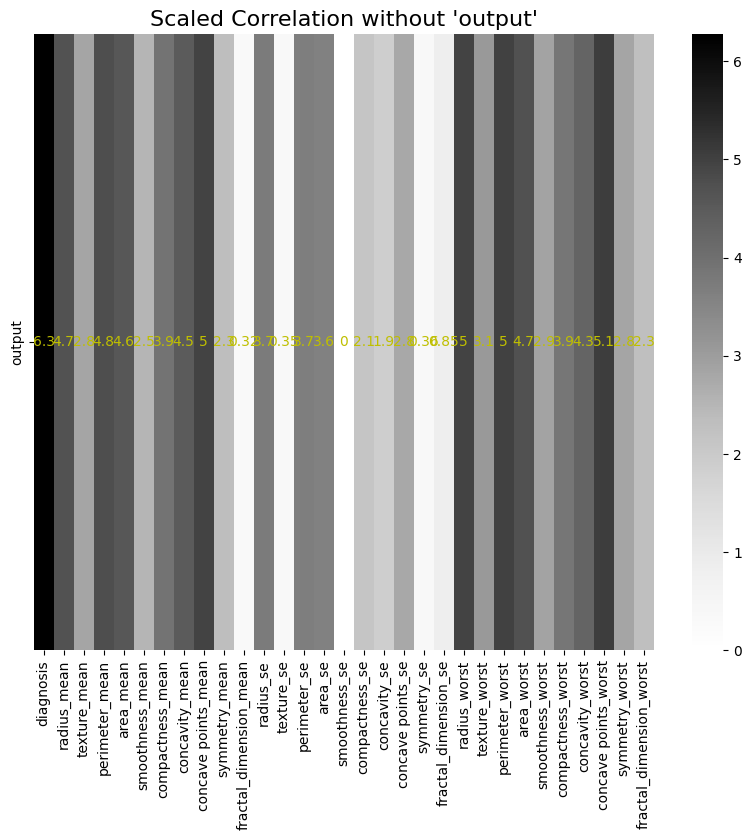

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import io
import base64
# 특성 열 선택
features = data
out = y
# Min-Max 스케일링 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
# 스케일링된 데이터로 DataFrame 생성
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df['output'] = out
# 상관관계 계산
correlation_matrix = scaled_df.corr()
# 'output' 열에 대한 상관관계 추출
output_correlation = correlation_matrix.drop('output')['output']
# 상관관계 값을 스케일링
scaled_output_correlation = (output_correlation - output_correlation.min()) / (output_correlation.max() - output_correlation.min())
# 합이 100이 되도록 조정
scaled_output_correlation = (scaled_output_correlation / scaled_output_correlation.sum()) * 100
# heatmap으로 상관관계 시각화
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=scaled_output_correlation.to_frame().T, annot=True, annot_kws=dict(color='y', fontsize=10), cmap='Greys')
plt.title("Scaled Correlation without 'output'", fontsize=16)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
# Base64로 인코딩
image_breast1 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_breast1 = "data:image/png;base64," + image_breast1
print(f"Image Variable: {image_breast1}")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# 로지스틱 회귀 함수
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)

predicted_zeros = X_test[y_pred == 0]  # 0으로 예측한 데이터
predicted_ones = X_test[y_pred == 1]  # 1으로 예측한 데이터

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
predicted_zeros = predicted_zeros.mean()

Image Variable: 

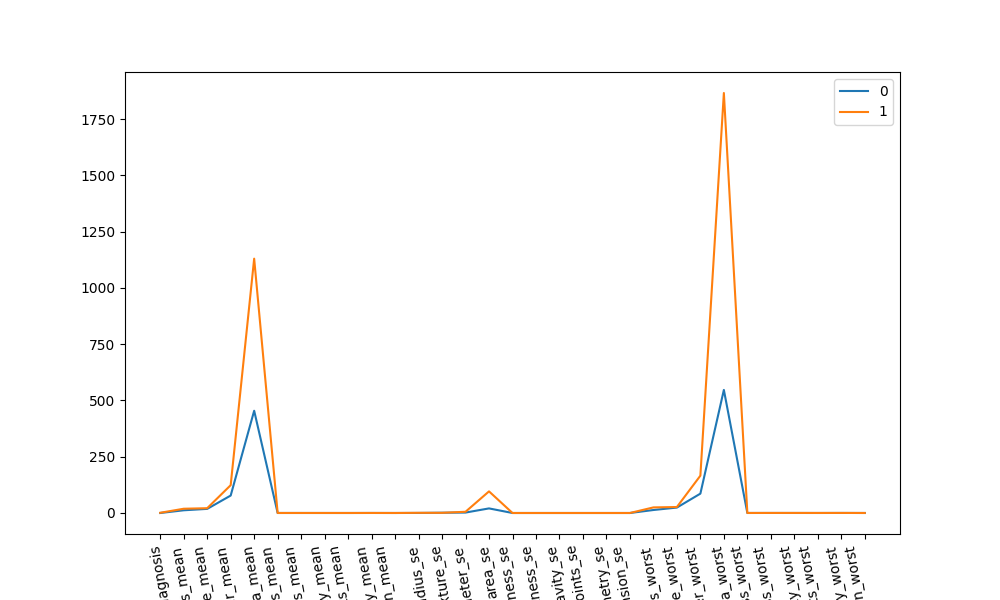

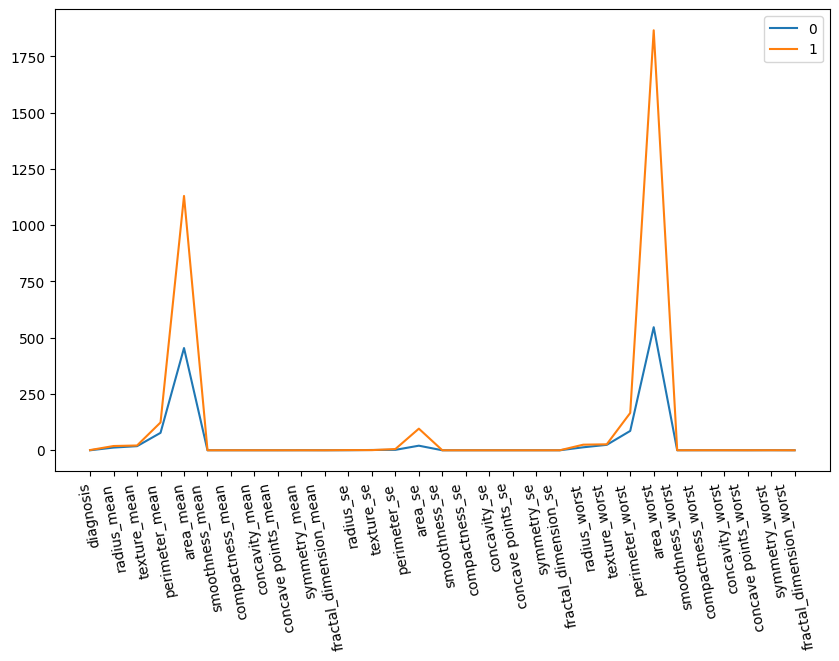

In [ ]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_ones.iloc[0])
plt.legend(['0', '1'])
plt.xticks(rotation=100)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_breast2 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_breast2 = "data:image/png;base64," + image_breast2
print(f"Image Variable: {image_breast2}")
plt.show()

In [ ]:
predicted_one = predicted_ones.mean()

Image Variable: 

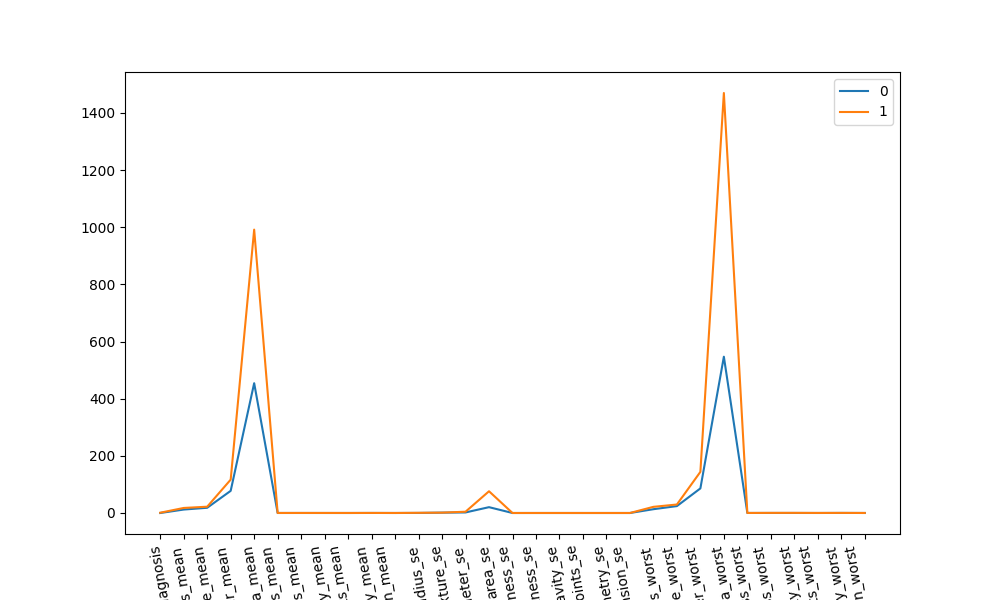

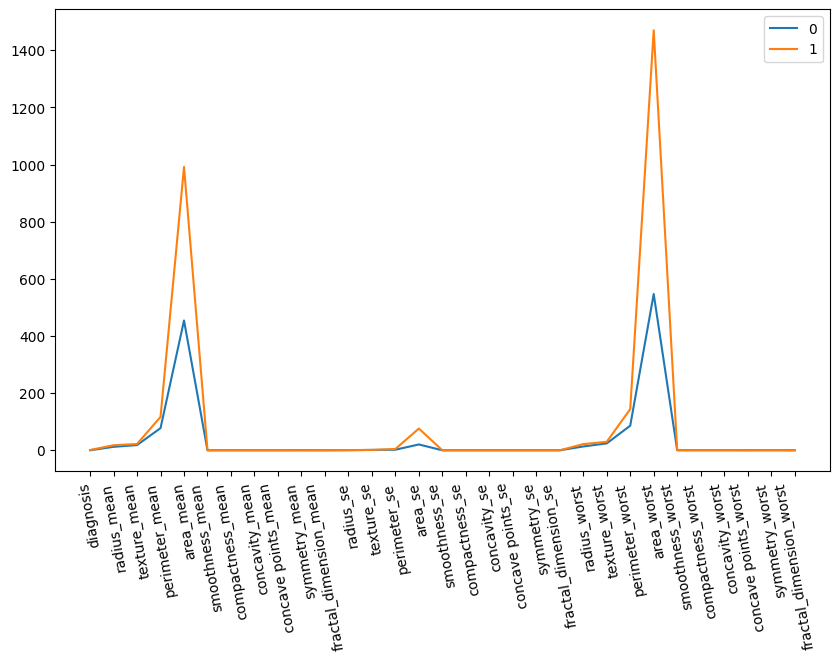

In [ ]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_one)
plt.legend(['0', '1'])
plt.xticks(rotation=100)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_breast3 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_breast3 = "data:image/png;base64," + image_breast3
print(f"Image Variable: {image_breast3}")
plt.show()

In [ ]:
# 데이터 SQL에 업로드
import mysql.connector
from mysql.connector import errorcode
config = {
  'host':'(your_sql_server_name).mysql.database.azure.com',
  'user':'(your_sql_user)',
  'password':'(your_sql_passwd)',
  'database':'web_db'
}
try:
   conn = mysql.connector.connect(**config)
   print("Connection established")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with the user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = conn.cursor()
cursor.execute(f"INSERT INTO breast_cancer VALUES(null,'{image_breast1}', '{image_breast2}', '{image_breast3}');")
print("Uploaded", cursor.rowcount, "row(s) of data.")
conn.commit()
cursor.close()
conn.close()
print("Done.")

NameError: ignored